In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
file_path = "/content/drive/MyDrive/stroke_risk_dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


In [ ]:
# Data cleaning

df.drop_duplicates(inplace=True)
if df.isnull().sum().sum() > 0:
    df.fillna(df.median(numeric_only=True), inplace=True)

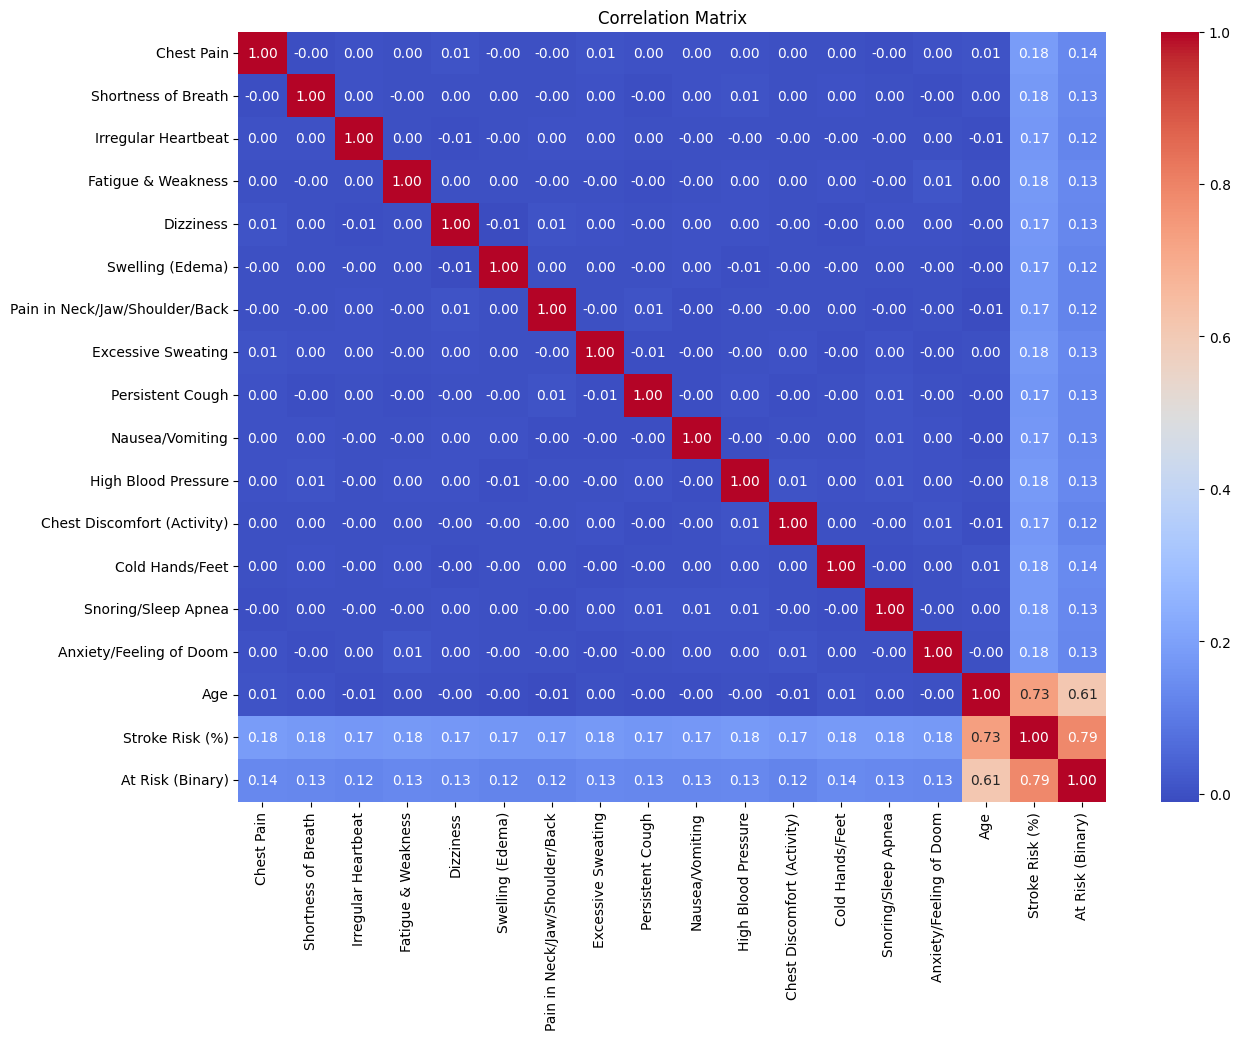

In [ ]:
# Visualization

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

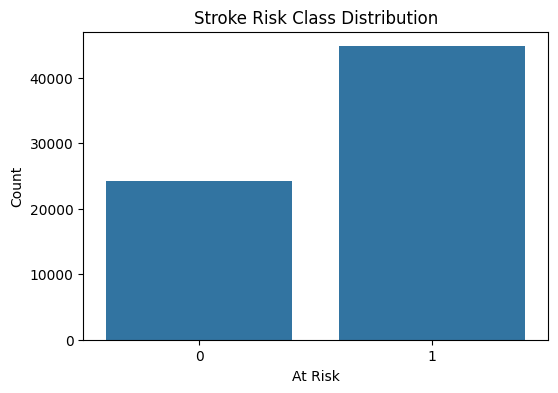

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='At Risk (Binary)', data=df)
plt.title("Stroke Risk Class Distribution")
plt.xlabel("At Risk")
plt.ylabel("Count")
plt.show()

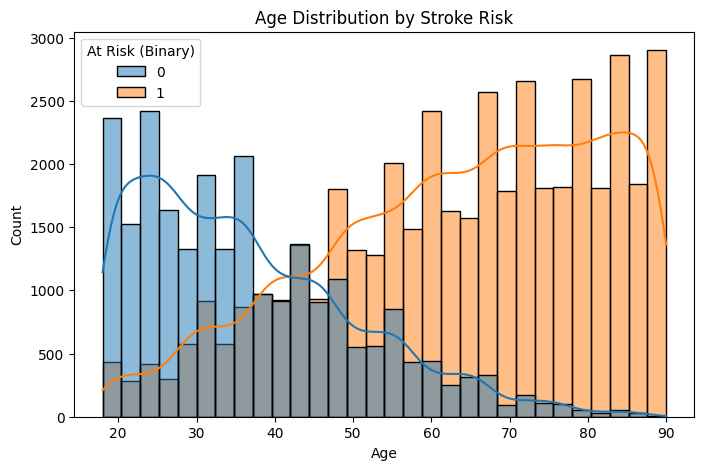

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Age", hue="At Risk (Binary)", bins=30, kde=True)
plt.title("Age Distribution by Stroke Risk")
plt.show()

In [ ]:
# Feature Selection & Scaling
X = df.drop(columns=["Stroke Risk (%)", "At Risk (Binary)"])
y_classification = df["At Risk (Binary)"]

In [ ]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split into train and test sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_scaled, y_classification, test_size=0.2, random_state=42, stratify=y_classification)

In [ ]:
# Model Training - Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_cls, y_train_cls)
y_pred_cls = rf_clf.predict(X_test_cls)

In [ ]:
# Evaluation
print("Classification Report:")
precision = precision_score(y_test_cls, y_pred_cls)
recall = recall_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls)
accuracy = accuracy_score(y_test_cls, y_pred_cls)

print(" Classification Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

Classification Report:
 Classification Evaluation Metrics:
Accuracy:  0.9460
Precision: 0.9520
Recall:    0.9655
F1-score:  0.9587


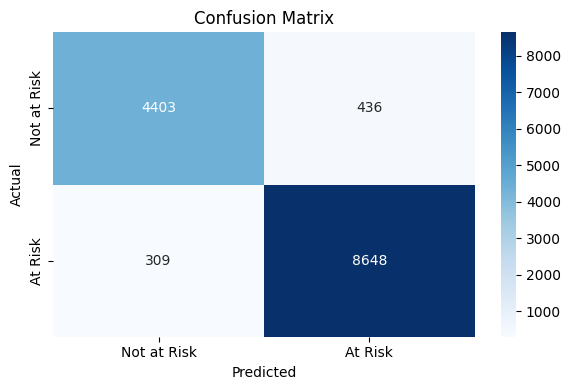

In [ ]:
conf_matrix = confusion_matrix(y_test_cls, y_pred_cls)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not at Risk", "At Risk"], yticklabels=["Not at Risk", "At Risk"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

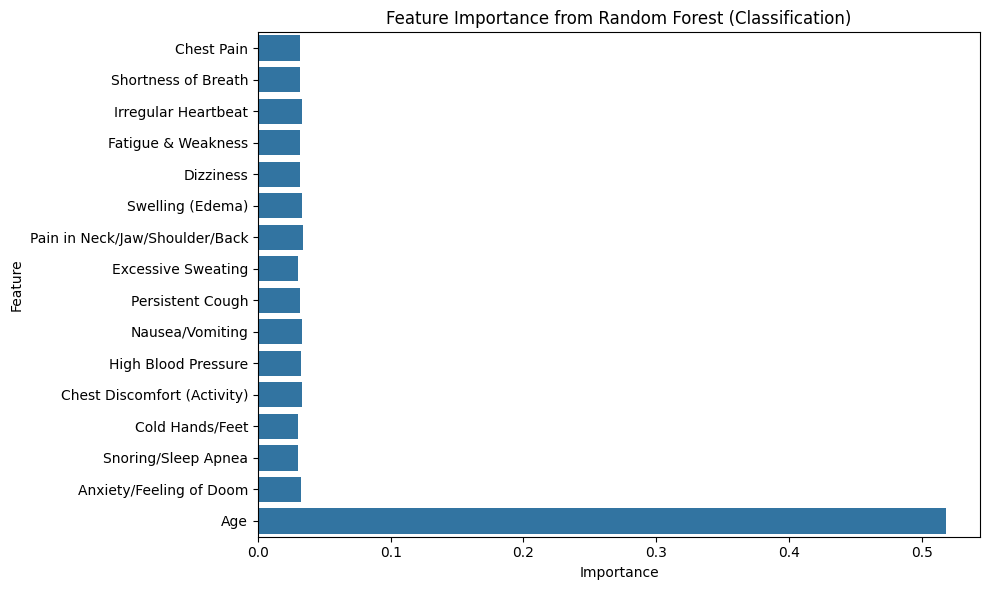

In [ ]:
# Feature Importance
importances = rf_clf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance from Random Forest (Classification)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

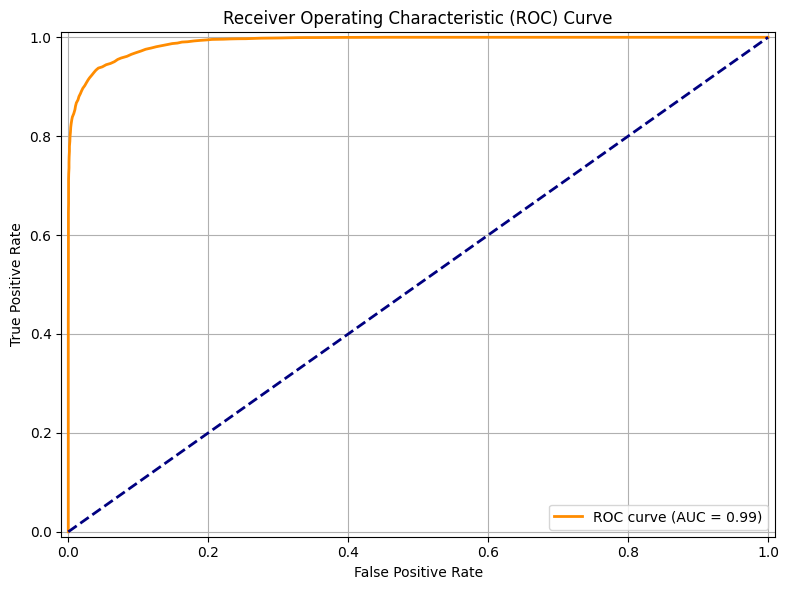

In [ ]:
# Get predicted probabilities for the positive class (1)
y_probs = rf_clf.predict_proba(X_test_cls)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test_cls, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()